# This is an Jupyter notebook hosted on Microsoft Azure.
Jupyter is an acronym for 'julia python r'. It supports numerous program languages and integrates with Github.

*Charles Becker, an unemployed student*

# What?!
*https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet*

This is my first live Jupyter (Python) notebook created from scratch.

*italics text* some _more italic text_

**really bold text here**

~~None of this around here~~

**_super special_**

now?

[Sonoma State University](http://sonoma.edu)



In [1]:
%pylab inline
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### A toy program

Name? CheZed
Welcome to Hello World, CheZed

  City  Population
0  NYC     8000000
1   LA     6000000
2  Chi     4380000
3  Hou     4800000
4  Bzm       55000

Seaborn defaults===============================>


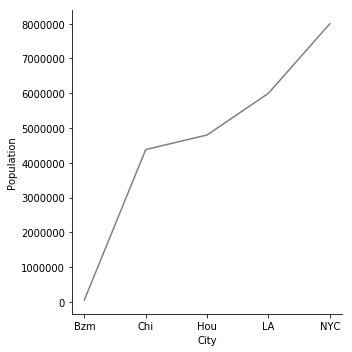

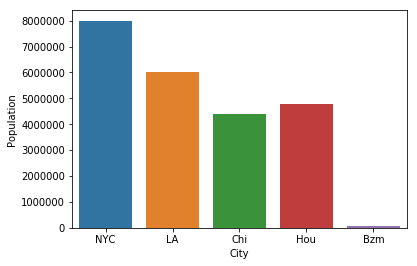


Matplotlib defaults============================>


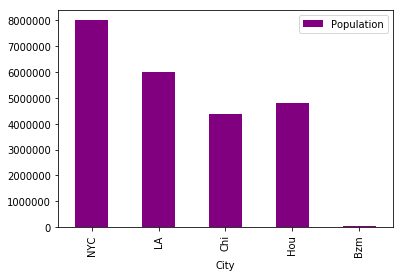

In [2]:
YourName = input("Name? ")
print("Welcome to Hello World, " + YourName)
print()

citydata = [['NYC', 8000000], ['LA', 6000000], ['Chi', 4380000],
    ['Hou', 4800000], ['Bzm', 55000]]
FirstDataFrame = pd.DataFrame(citydata, columns=['City', 'Population'])
print(FirstDataFrame)
print()

# using seaborn approach
print("Seaborn defaults===============================>")
sns.relplot(x="City", y="Population", data=FirstDataFrame, kind="line", color="gray")
plt.show()
plot1 = sns.barplot(x="City", y="Population", data=FirstDataFrame)
plt.show()
print()

# pandas (FirstDataFrame) having tight integration with matplotlib.pyplot
print("Matplotlib defaults============================>")
plot2 = FirstDataFrame.plot(kind = 'bar', x='City', y='Population', color="purple")
plt.show()

### Work with list processing a bit

In [3]:
myListOrig = [3,2,4,3,5,6,8,7]
print("Original " + str(myListOrig))
myListSquared = [i**2 for i in myListOrig]
print("Squared " + str(myListSquared))

Original [3, 2, 4, 3, 5, 6, 8, 7]
Squared [9, 4, 16, 9, 25, 36, 64, 49]


In [4]:
myListOrig = [3,2,4,3,5,6,8,7]
print("Original " + str(myListOrig))
myListSquared = []
for index in range(len(myListOrig)):
    myListSquared.append(myListOrig[index]**2)
print("Squared " + str(myListSquared))

Original [3, 2, 4, 3, 5, 6, 8, 7]
Squared [9, 4, 16, 9, 25, 36, 64, 49]


### Now work with some real data doing DS type stuffs

In [2]:
abDat = pd.read_csv("abalone_data_with_column_names.csv")

In [8]:
abDat.head(6)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [9]:
abDat.tail(6)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [7]:
max(abDat["Length"])

0.815

In [8]:
print(mean(abDat["Length"]))
print("{0:.3f}".format(mean(abDat["Length"])))

0.5239920995930099
0.524


# Next I will run a simple linear regression
Dependent variable will be "WholeWeight"
Independent variable will begin with "Rings" and hopefully progress to add my predictors
with luck ending in an MLR-type situation.

Note that 'statsmodel.api' is the correct import statement to access the '.OLS' method.
Unlike R, you have to add 'sm.add_constant()' to get the intercept value.

In [12]:
en1 = abDat.WholeWeight
ex1 = sm.add_constant(abDat.Rings)
abSize = sm.OLS(en1, ex1)
abRes = abSize.fit()
print(abRes.summary())

                            OLS Regression Results                            
Dep. Variable:            WholeWeight   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     1722.
Date:                Thu, 25 Apr 2019   Prob (F-statistic):          1.89e-315
Time:                        21:19:24   Log-Likelihood:                -2228.8
No. Observations:                4177   AIC:                             4462.
Df Residuals:                    4175   BIC:                             4474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0123      0.021      0.593      0.5

### Plot it

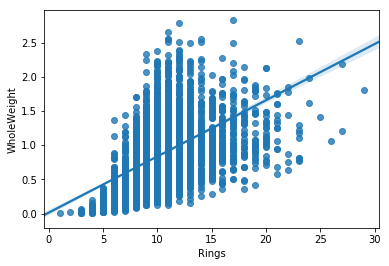

In [9]:
sns.regplot(x='Rings', y='WholeWeight', data=abDat)

### Now for a multiple linear regression
'WholeWeight' still the dependent variable
'Rings' + 'Sex' are the predictors
'Sex' is a categorial, so...
### I will create dummy variable for sex (female, indeterminate, male)

In [5]:
# this approach is derived from a post by Akvall @ StackOverflow
abDat = pd.read_csv("abalone_data_with_column_names.csv")
sex_dum = pd.get_dummies(abDat['Sex'])
abDat_sex_dum = pd.concat([abDat, sex_dum], axis=1)
abResult = sm.OLS(abDat_sex_dum['WholeWeight'], sm.add_constant(abDat_sex_dum[['Rings', 'F', 'I']])).fit()
print(abResult.summary())

# save abDat_sex_dum dataset to a file
abDat_sex_dum.to_csv("abdat_w_sex_dum.csv")

                            OLS Regression Results                            
Dep. Variable:            WholeWeight   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1010.
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:55:16   Log-Likelihood:                -1809.9
No. Observations:                4177   AIC:                             3628.
Df Residuals:                    4173   BIC:                             3653.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3967      0.023     16.956      0.0

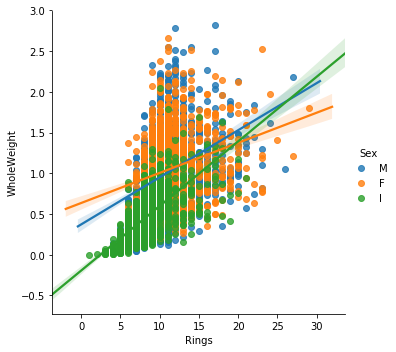

In [6]:
sns.lmplot(x='Rings', y='WholeWeight', data=abDat_sex_dum, hue='Sex')